In [23]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

import fna

import pipeline as pipeline

sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

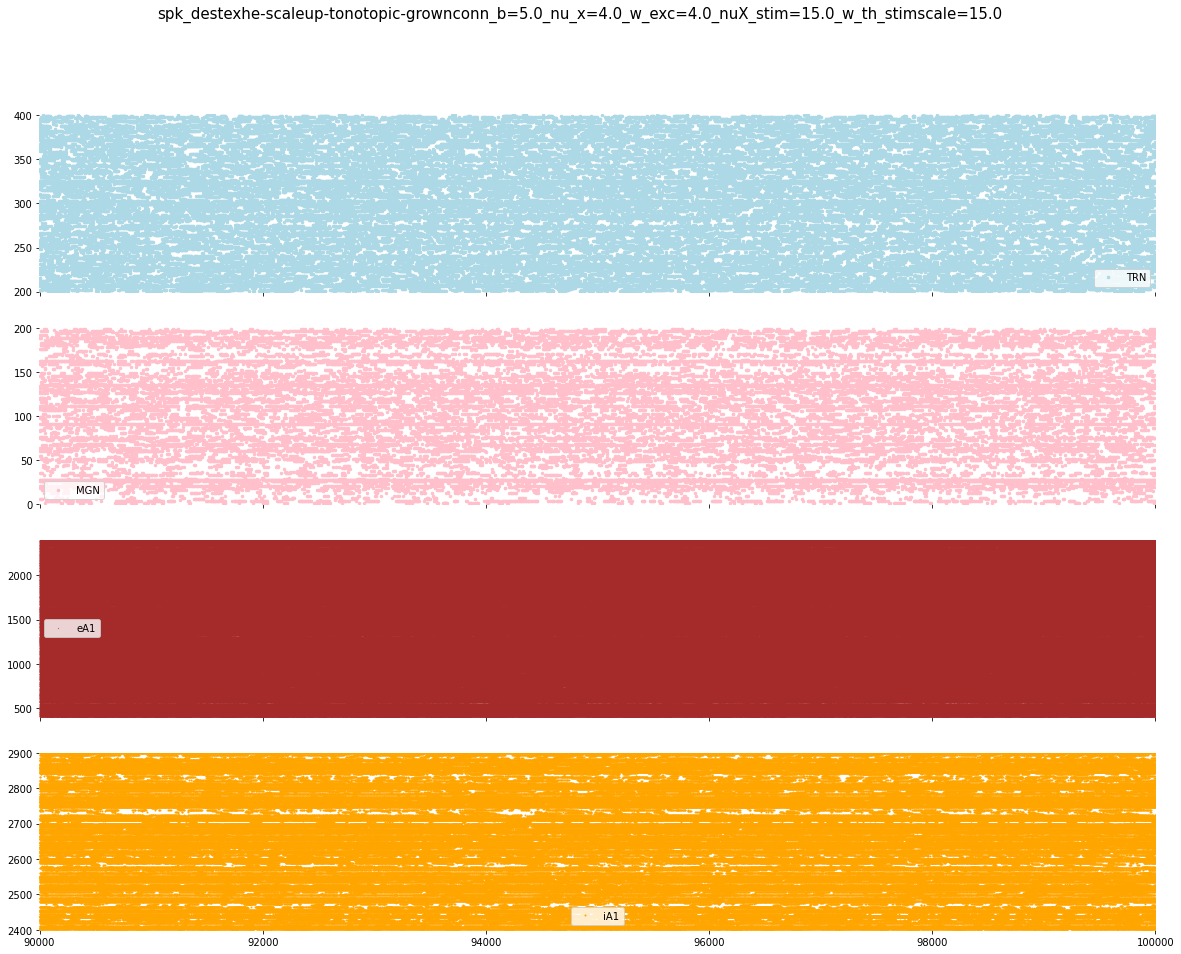

In [25]:
pth = "../demyelination/data/destexhe-scaleup-tonotopic-grownconn/activity/"
f = ['spk_destexhe-scaleup-tonotopic-grownconn_b=5.0_nu_x=4.0_w_exc=4.0_nuX_stim=15.0_w_th_stimscale=15.0']

p = pd.read_pickle(pth + f[0])
#fig, ax = plt.subplots(nrows=6, ncols=1)
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])


tstart = 90 * 1000
tstop = 100 * 1000

p.spikeobj['TRN'].time_slice(tstart, tstop)\
.raster_plot(ax=ax[0], dt=10, display=False, color='lightblue', ms=5, label="TRN")

p.spikeobj['MGN'].time_slice(tstart, tstop)\
.raster_plot(ax=ax[1], dt=10, display=False, color='pink', ms=5, label="MGN")

p.spikeobj['eA1'].time_slice(tstart, tstop)\
.raster_plot(ax=ax[2], dt=10, display=False, color='brown', ms=.5, label="eA1")

p.spikeobj['iA1'].time_slice(tstart, tstop)\
.raster_plot(ax=ax[3], dt=10, display=False, color='orange', ms=2, label="iA1")

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
#     ax[x].tick_params(labelbottom=False)
#     ax[x].get_yaxis().set_ticks([])
    ax[x].legend()

fig.suptitle(f[0], fontsize=15);

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/raster-" + f[0] + ".pdf")

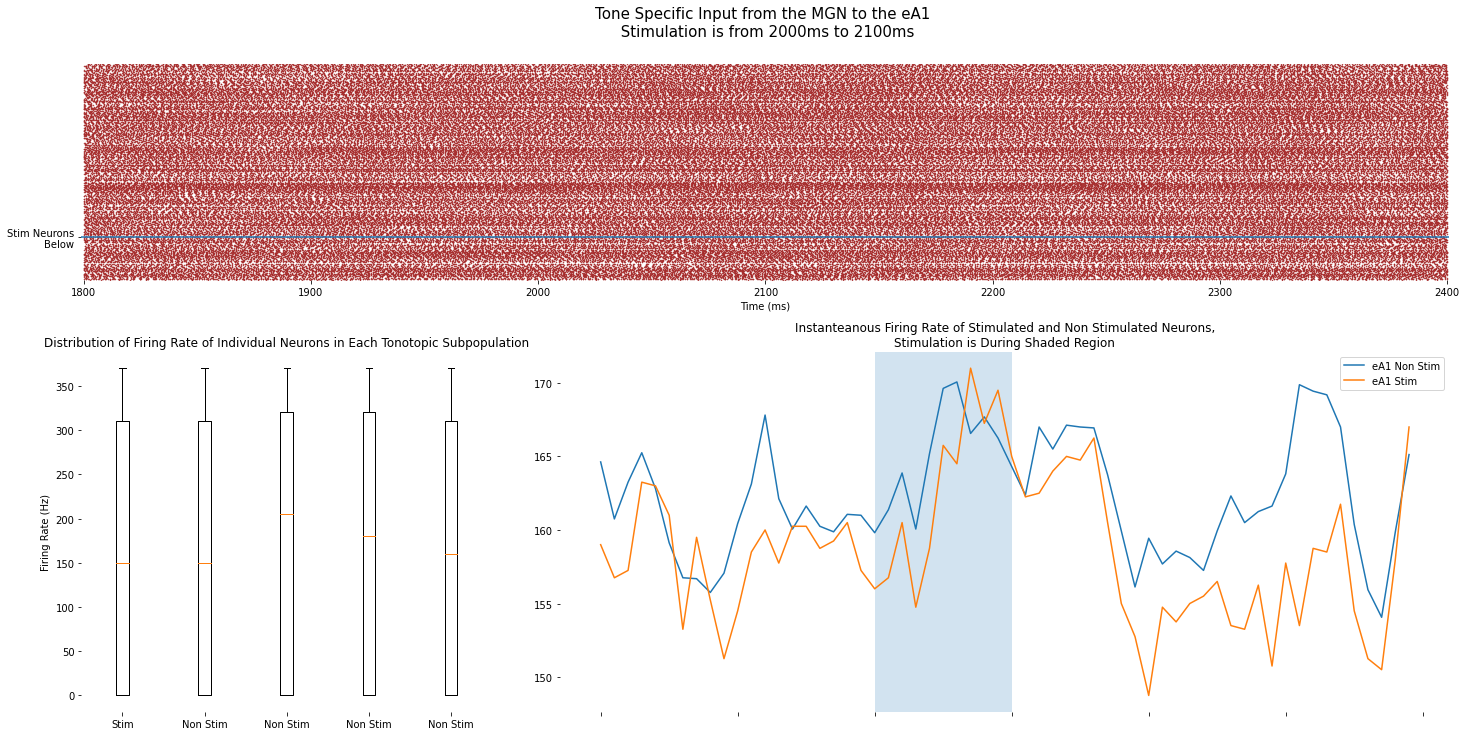

In [26]:
fig = plt.figure()
fig.set_size_inches((19, 10))

# BOX WHISKER PLOT
ax = fig.add_axes([0, 0, .3, .5], frameon=False)
tstart, tstop = 2000, 2100
# ax.hist(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop).mean_rates()\
#               , density=True, alpha=0.3, label="eA1 Non Stim", log=True);
# ax.hist(p.spikeobj['eA1'].id_slice(np.arange(401, 800)).time_slice(tstart, tstop).mean_rates()\
#               , density=True, alpha=0.3, label="eA1 Stim", log=True);
for x in range(1, 6):
    nstart = (400*x)+1
    ax.boxplot(p.spikeobj['eA1'].id_slice(np.arange(nstart, nstart+400)).time_slice(tstart, tstop).mean_rates(),
              positions=[x], sym="")
# ax.legend()
ax.set_ylabel("Firing Rate (Hz)")
ax.set_xticks(range(1, 6), ["Stim", "Non Stim", "Non Stim", "Non Stim", "Non Stim"])
ax.set_title("Distribution of Firing Rate of Individual Neurons in Each Tonotopic Subpopulation")

tstart, tstop = 1800, 2400

# INST FIRING RATE PLOT
ax = fig.add_axes([.35, 0, .65, .5], frameon=False)
ax.plot(\
p.spikeobj['eA1'].id_slice(np.arange(801, 2401)).time_slice(tstart, tstop).firing_rate(10, average=True)
        , label="eA1 Non Stim")
ax.plot(\
p.spikeobj['eA1'].id_slice(np.arange(401, 801)).time_slice(tstart, tstop).firing_rate(10, average=True)
        , label="eA1 Stim")
ax.legend()
ax.set_title("Instanteanous Firing Rate of Stimulated and Non Stimulated Neurons,\nStimulation is During Shaded Region")
ax.tick_params(labelbottom=False)
ax.axvspan(20, 30, alpha=.2)

# RASTER PLOT
ax = fig.add_axes([0, .6, 1, .3], frameon=False)
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax, dt=10, display=False, color='brown', ms=1)

ax.set_frame_on(False)
# ax.tick_params(labelbottom=False)
ax.set_xlabel("Time (ms)")

ax.set_yticks([800], ['Stim Neurons\nBelow'])

ax.axhline(800)

fig.suptitle("Tone Specific Input from the MGN to the eA1 \n Stimulation is from 2000ms to 2100ms", fontsize=15);

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/tonostim-comparison-eaone.jpg")

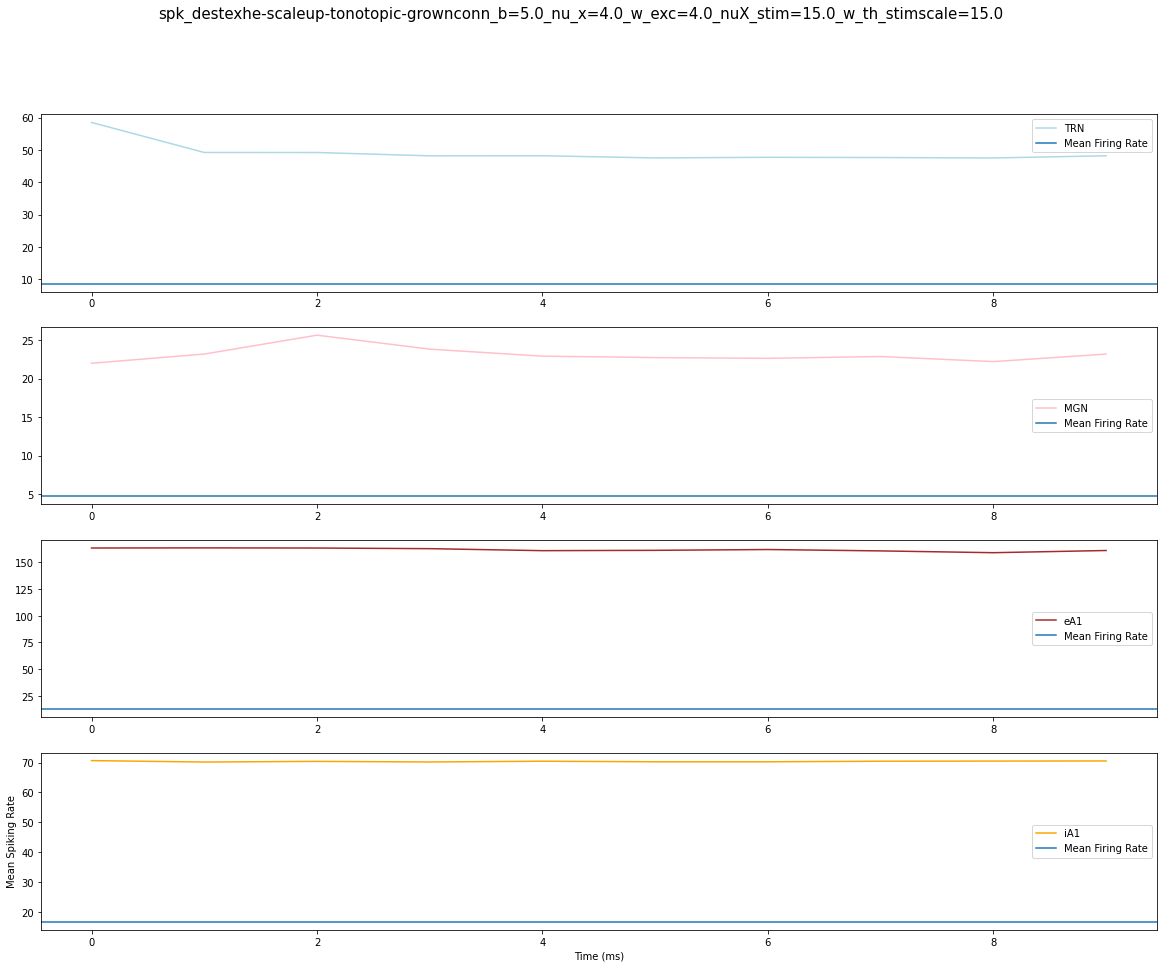

In [27]:
fig, ax = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(20, 15)

tstart = 0 * 1000
tstop = 10 * 1000
    
resolution = 1000

x = p.spikeobj['TRN'].time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = p.spikeobj['MGN'].time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Mean Firing Rate")

#x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(401, 800)).time_slice(tstart, tstop))
# x = p.spikeobj['eA1'].id_slice(np.arange(401, 800)).time_slice(tstart, tstop).firing_rate(resolution, average=True)
# ax[0].plot(x, label='eA1', c='brown')

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Mean Firing Rate")

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
# ax[2].spines.right.set_visible(False)
# ax[2].spines.top.set_visible(False)

[ax[_].legend() for _ in range(4)]

plt.suptitle(f[0]\
             , fontsize=15);

# meanFiringRates(p)


# plt.savefig("/home/pbr-student/Downloads/thesis-plots/mfr-" + f[0] + ".pdf")